# INPUT SIGNALS

In [ ]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from decimal import Decimal
import pdb

A = 1

In [ ]:
def evaluate_periodic_sine_and_a_half(time_array : list, v_max):
    V_MAX = v_max
    res = []
    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal(str(3*np.pi)))

        if t_in_oritginal_period > 0:
            y = V_MAX * np.sin(t_in_oritginal_period)
        else:
            y = V_MAX * np.sin(t_in_oritginal_period + 3*np.pi)
        res.append(y)
    return np.asarray(res)

In [ ]:
def evaluate_periodic_exp(time_array : list, v_max):
    V_MAX = v_max
    res = []
    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal('10'))

        if t_in_oritginal_period < 0:
            t_in_oritginal_period = 10 - t_in_oritginal_period

        if t_in_oritginal_period < 5:
            y = V_MAX * np.e**(-np.abs(t_in_oritginal_period))
        else:
            y = V_MAX * np.e**(-np.abs(t_in_oritginal_period - 10))
            
        res.append(y)
    return np.asarray(res)

In [ ]:
def compute_fft(time_interval, signal, period, n_periods=1, window='boxcar'):
  ''' window can be: 
      'boxcar' (rectangle),
      'barthann' (Bartlett-Hann), 
      'bartlett',
      'hanning', 
      'hamming',
      'tukey',
      'flattop',
      'hann',
      'nuttall',
      'parzen',
      'cosine',
      'blackman',
      'bohman',
      'blackmanharris' '''
  import numpy as np
  import scipy.signal as ss

  t_step = (max(time_interval) - min(time_interval)) / len(time_interval)
  points_in_period = int(np.rint(period / t_step))

  try:
    window = getattr(ss, window)((points_in_period * n_periods))
    amount_of_zeros_to_pad = len(signal) - len(window)
    window = np.append(window, [0] * amount_of_zeros_to_pad)
    signal_for_fft = np.multiply(signal, window)[:(points_in_period * n_periods)]
  except AttributeError:
      return

  fft = np.fft.fft(signal_for_fft)
  N = signal_for_fft.size
  f = np.fft.fftfreq(N, d=t_step)

  return (f, fft, N)

In [ ]:
def fft(time_interval, signal, period, mode='fast'):
    ''' time_interval: array containing time values for the signal meant to be transformed.

        signal: array containing signal meant to be transformed.

        period: period of the signal to be transformed.

        If mode='fast', only one period will be used from the input signal.
        If mode='best', the max amount of periods will be used.
        'fast' is default.'''

    if mode == 'best':
        n_p = int(np.rint((max(time_interval) - min(time_interval)) / period))
    elif mode == 'fast':
        n_p = 1
    else:
        return
    
    window_types = ['boxcar', 'barthann', 'bartlett', 'hanning', 'hamming', 'tukey', 'hann', 'nuttall', 'parzen', 'cosine', 'blackman', 'bohman', 'blackmanharris']

    fft = []
    merits = []
    for w in window_types:
      f, X, N = compute_fft(time_interval, signal, period, n_periods=n_p, window=w)
      new_fft = [f, X, N, w]
      fft.append(new_fft)

      merit = 0
      max_bin = max(np.abs(X))
      for X_bin in X:
        if np.abs(X_bin) < (0.2*max_bin):
          merit = merit + np.abs(X_bin)
      
    
      merits.append(merit)

    return fft[merits.index(min(merits))]

In [ ]:
periods_to_use = 5
period_A = 0.002
period_B1 = 3*np.pi
period_B2 = 10
period_C = 0.01

t_A = np.linspace(-0.002, 0.008, periods_to_use * 100)
t_B1 = np.linspace(-3*np.pi, 12*np.pi, periods_to_use * 1000)
t_B2 = np.linspace(-5, 45, periods_to_use * 1000)
t_C = np.linspace(-0.01, 0.04, periods_to_use * 1000)

x_A = A * np.cos(2 * np.pi * 0.5e3 * t_A)
x_B1 = evaluate_periodic_sine_and_a_half(t_B1, A)
x_B2 = evaluate_periodic_exp(t_B2, A)
x_C = A * (0.5 * np.cos(2*np.pi * 0.9e3 * t_C) + np.cos(2*np.pi * 1e3 * t_C) + 0.5 * np.cos(2*np.pi * 1.1e3 * t_C))

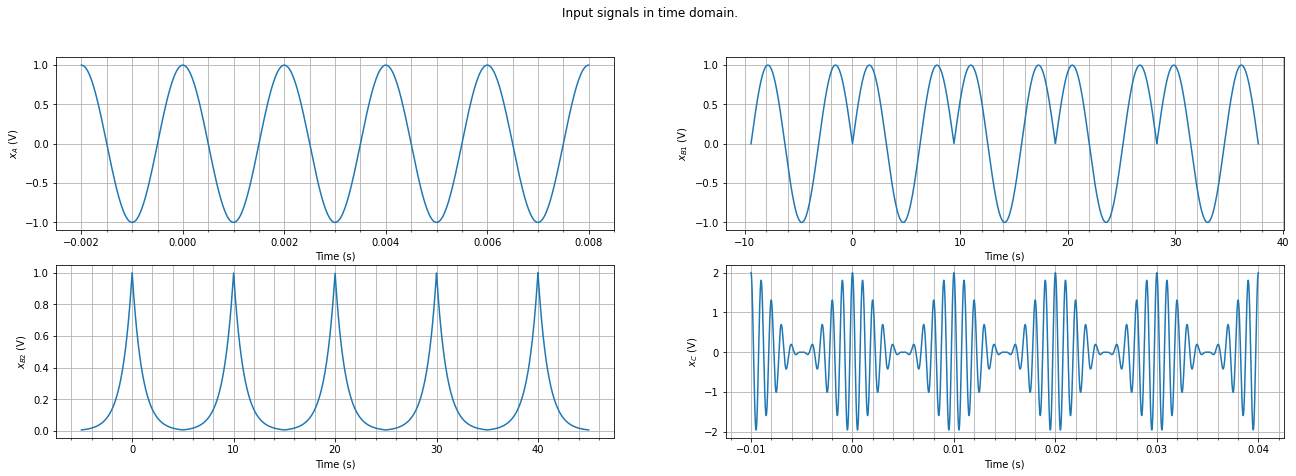

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in time domain.')

ax1.plot(t_A, x_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_A $ (V)')

ax2.plot(t_B1, x_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1} $ (V)')

ax3.plot(t_B2, x_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2} $ (V)')

ax4.plot(t_C, x_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_C $ (V)')

fig.show()

In [ ]:
f_A, X_A, N_A = compute_fft(t_A, x_A, period_A, 5)
f_B1, X_B1, N_B1 = compute_fft(t_B1, x_B1, period_B1, 5)
f_B2, X_B2, N_B2 = compute_fft(t_B2, x_B2, period_B2, 5)
f_C, X_C, N_C = compute_fft(t_C, x_C, period_C, 5)

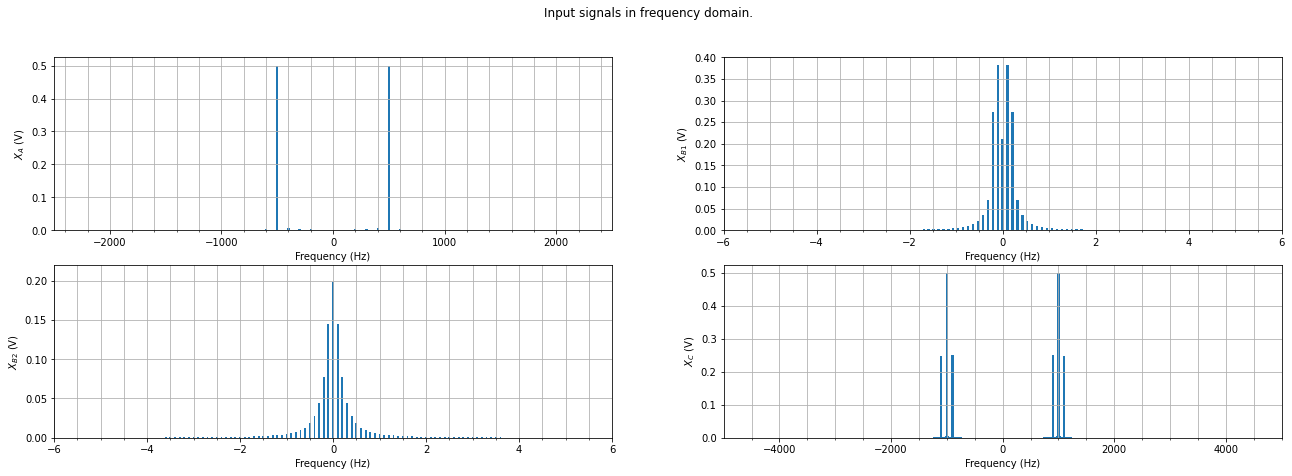

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in frequency domain.')

ax1.bar(f_A, np.abs(X_A) * 1/N_A, width=20)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_A $ (V)')
ax1.set_xlim(left=-2500, right=2500)

ax2.bar(f_B1, np.abs(X_B1) * 1/N_B1, width=0.05)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1} $ (V)')
ax2.set_xlim(left=-6, right=6)
ax2.set_ylim(top=0.4)

ax3.bar(f_B2, np.abs(X_B2) * 1/N_B2, width=0.04)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2} $ (V)')
ax3.set_xlim(left=-6, right=6)
ax3.set_ylim(top=0.22)

ax4.bar(f_C, np.abs(X_C) * 1/N_C, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_C $ (V)')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

# ANTI-ALIASING FILTER

In [ ]:
def apply_aaf(input_time, input_signal_in_time, input_freq, input_signal_in_frequency, f_aaf):
    tau = 2 * f_aaf

    aaf_pulse = [0] * int(len(input_signal_in_frequency))
    for i in range(len(input_freq)):
        if np.abs(input_freq[i]) < (tau / 2):
            aaf_pulse[i] = 1

    res_freq = np.multiply(input_signal_in_frequency, aaf_pulse)
    res_time = np.fft.ifft(res_freq)

    return (res_time, res_freq)

In [ ]:
f_aaf_low = 2.5
f_aaf_high = 1.8e3

x_A_filtered, X_A_filtered = apply_aaf(t_A, x_A, f_A, X_A, f_aaf_high)
x_B1_filtered, X_B1_filtered = apply_aaf(t_B1, x_B1, f_B1, X_B1, f_aaf_low)
x_B2_filtered, X_B2_filtered = apply_aaf(t_B2, x_B2, f_B2, X_B2, f_aaf_low)
x_C_filtered, X_C_filtered = apply_aaf(t_C, x_C, f_C, X_C, f_aaf_high)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


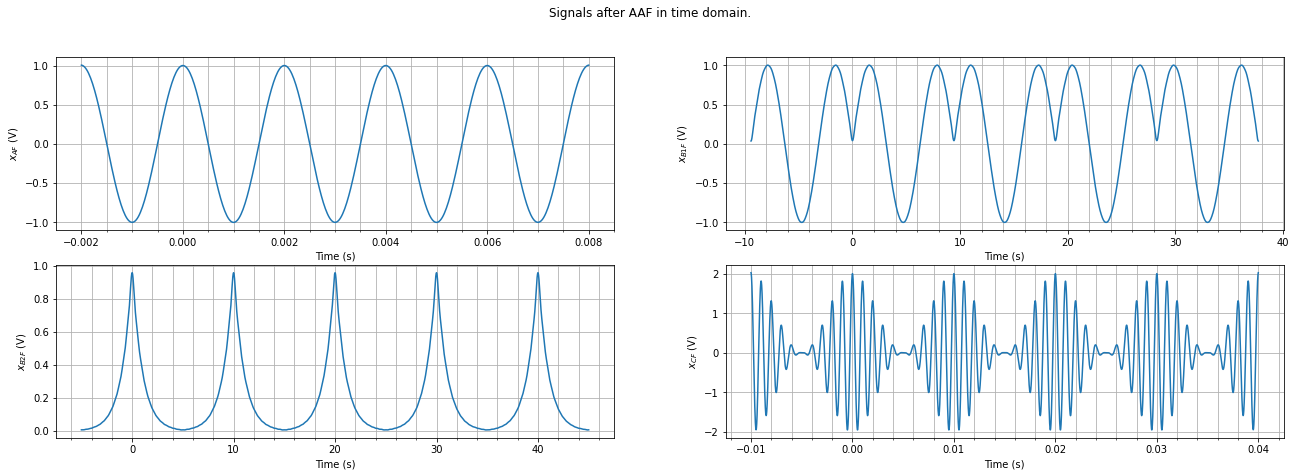

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF in time domain.')

ax1.plot(t_A, x_A_filtered)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V)')

ax2.plot(t_B1, x_B1_filtered)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V)')

ax3.plot(t_B2, x_B2_filtered)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V)')

ax4.plot(t_C, x_C_filtered)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V)')

fig.show()

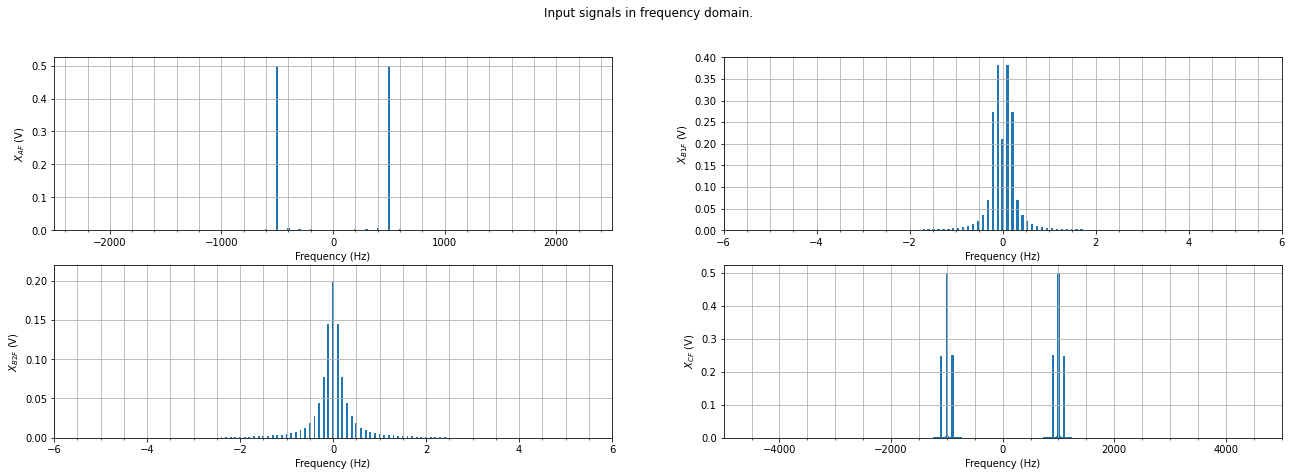

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in frequency domain.')

ax1.bar(f_A, np.abs(X_A_filtered) * 1/N_A, width=20)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V)')
ax1.set_xlim(left=-2500, right=2500)

ax2.bar(f_B1, np.abs(X_B1_filtered) * 1/N_B1, width=0.05)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V)')
ax2.set_xlim(left=-6, right=6)
ax2.set_ylim(top=0.4)

ax3.bar(f_B2, np.abs(X_B2_filtered) * 1/N_B2, width=0.04)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V)')
ax3.set_xlim(left=-6, right=6)
ax3.set_ylim(top=0.22)

ax4.bar(f_C, np.abs(X_C_filtered) * 1/N_C, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V)')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

# NATURAL SAMPLING 

### Using frequency of our oscilator

In [ ]:
f_s_low = 600e3 / (2**16)
f_s_high = 600e3 / (2**7)
duty = 0.1

natural_sampling_signal_A = (ss.square(2 * np.pi * f_s_high * t_A, duty=duty) + 1) /2
natural_sampling_signal_B1 = (ss.square(2 * np.pi * f_s_low * t_B1, duty=duty) + 1) / 2
natural_sampling_signal_B2 = (ss.square(2 * np.pi * f_s_low * t_B2, duty=duty) + 1) / 2
natural_sampling_signal_C = (ss.square(2 * np.pi * f_s_high * t_C, duty=duty) + 1) / 2

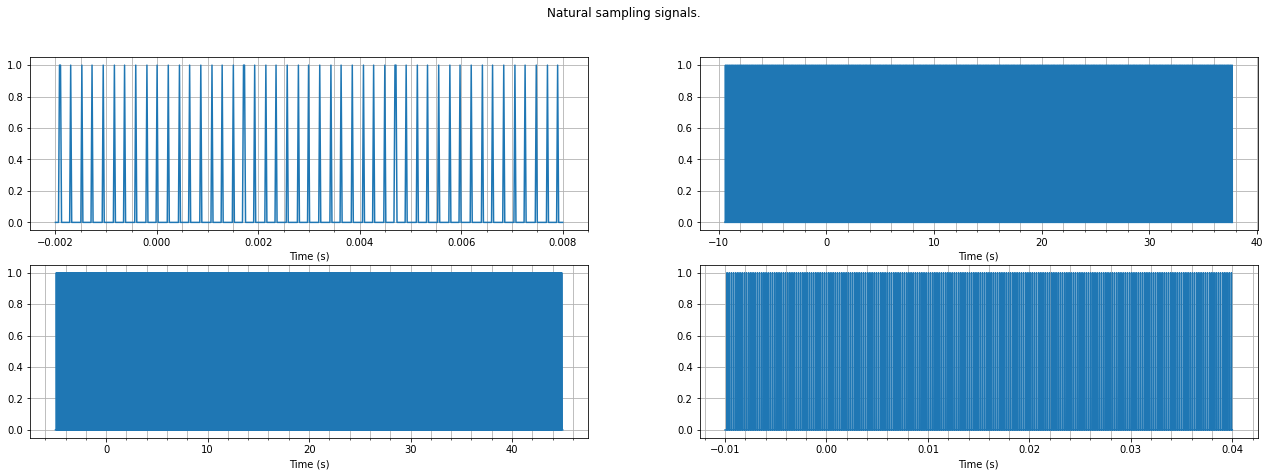

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Natural sampling signals.')

ax1.plot(t_A, natural_sampling_signal_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')

ax2.plot(t_B1, natural_sampling_signal_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')

ax3.plot(t_B2, natural_sampling_signal_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')

ax4.plot(t_C, natural_sampling_signal_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')

fig.show()

In [ ]:
x_A_filtered_ns = np.multiply(x_A_filtered, natural_sampling_signal_A)
x_B1_filtered_ns = np.multiply(x_B1_filtered, natural_sampling_signal_B1)
x_B2_filtered_ns = np.multiply(x_B2_filtered, natural_sampling_signal_B2)
x_C_filtered_ns = np.multiply(x_C_filtered, natural_sampling_signal_C)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


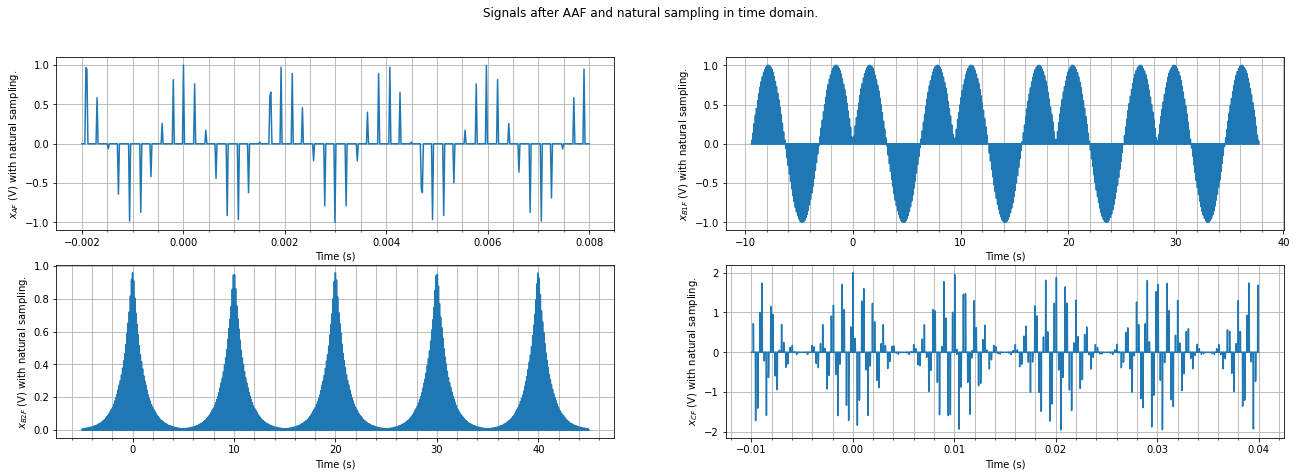

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and natural sampling in time domain.')

ax1.plot(t_A, x_A_filtered_ns)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V) with natural sampling.')

ax2.plot(t_B1, x_B1_filtered_ns)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V) with natural sampling.')

ax3.plot(t_B2, x_B2_filtered_ns)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V) with natural sampling.')

ax4.plot(t_C, x_C_filtered_ns)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V) with natural sampling.')

fig.show()

In [ ]:
f_A_filtered_ns, X_A_filtered_ns, N_A_filtered_ns = compute_fft(t_A, x_A_filtered_ns, period_A, 5, window='boxcar')
# f_B1_filtered_ns, X_B1_filtered_ns, N_B1_filtered_ns = compute_fft(t_B1, x_B1_filtered_ns, period_B1, 5, window='boxcar')
# f_B2_filtered_ns, X_B2_filtered_ns, N_B2_filtered_ns = compute_fft(t_B2, x_B2_filtered_ns, 10, window='boxcar')
# f_C_filtered_ns, X_C_filtered_ns, N_C_filtered_ns = compute_fft(t_C, x_C_filtered_ns, 0.01, window='boxcar')

# f_A_filtered_ns, X_A_filtered_ns, N_A_filtered_ns, window_used_A = fft(t_A, x_A_filtered_ns, period_B1, 'best')
f_B1_filtered_ns, X_B1_filtered_ns, N_B1_filtered_ns, window_used_B1 = fft(t_B1, x_B1_filtered_ns, period_B1, 'best')
f_B2_filtered_ns, X_B2_filtered_ns, N_B2_filtered_ns, window_used_B2 = fft(t_B2, x_B2_filtered_ns, 10, 'best')
f_C_filtered_ns, X_C_filtered_ns, N_C_filtered_ns, window_used_C = fft(t_C, x_C_filtered_ns, 0.01, 'best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!


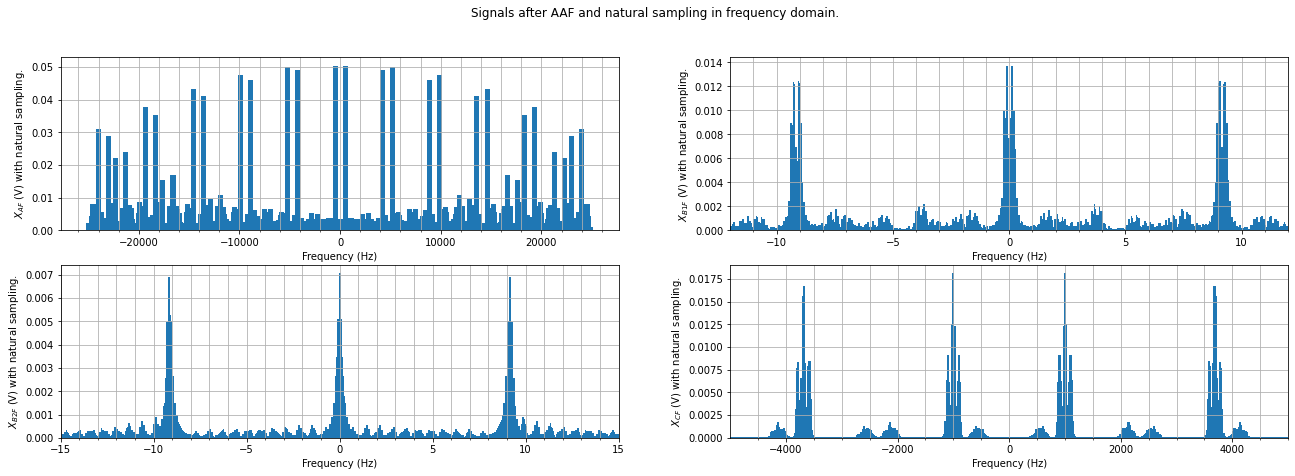

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and natural sampling in frequency domain.')

ax1.bar(f_A_filtered_ns, np.abs(X_A_filtered_ns) * 1/N_A_filtered_ns, width=500)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V) with natural sampling.')

ax2.bar(f_B1_filtered_ns, np.abs(X_B1_filtered_ns) * 1/N_B1_filtered_ns, width=0.08)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V) with natural sampling.')
ax2.set_xlim(left=-12, right=12)

ax3.bar(f_B2_filtered_ns, np.abs(X_B2_filtered_ns) * 1/N_B2_filtered_ns, width=0.1)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V) with natural sampling.')
ax3.set_xlim(left=-15, right=15)

ax4.bar(f_C_filtered_ns, np.abs(X_C_filtered_ns) * 1/N_C_filtered_ns, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V) with natural sampling.')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

### Using ideal frequency (multiple of the signal's frequency)

In [ ]:
duty = 0.1

natural_sampling_signal_A = (ss.square(2 * np.pi * 5e3 * t_A, duty=duty) + 1) /2
natural_sampling_signal_B1 = (ss.square(2 * np.pi * (40 * 1/(period_B1)) * t_B1, duty=duty) + 1) / 2
natural_sampling_signal_B2 = (ss.square(2 * np.pi * 10 * t_B2, duty=duty) + 1) / 2
natural_sampling_signal_C = (ss.square(2 * np.pi * 3e3 * t_C, duty=duty) + 1) / 2

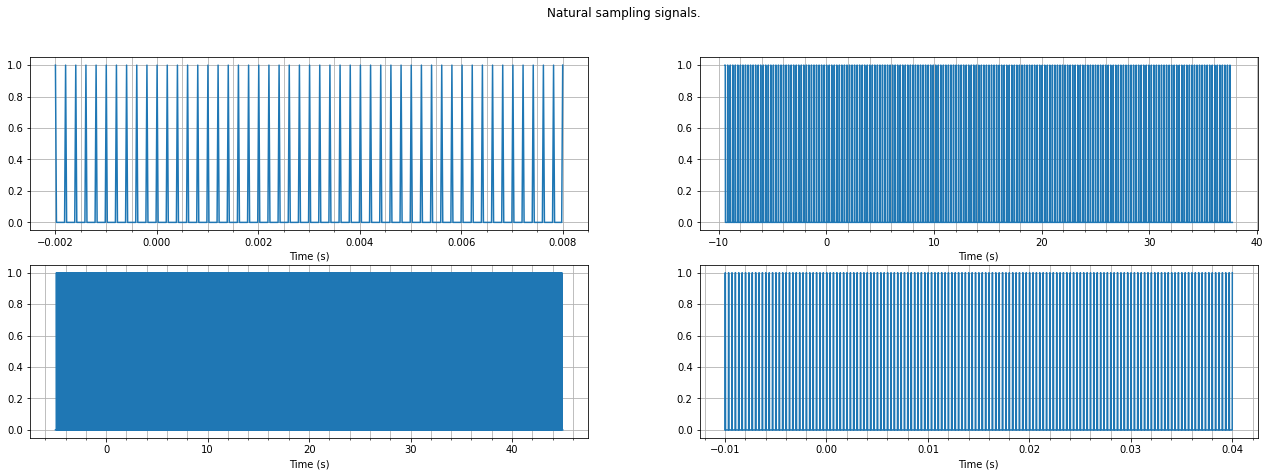

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Natural sampling signals.')

ax1.plot(t_A, natural_sampling_signal_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')

ax2.plot(t_B1, natural_sampling_signal_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')

ax3.plot(t_B2, natural_sampling_signal_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')

ax4.plot(t_C, natural_sampling_signal_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')

fig.show()

In [ ]:
x_A_filtered_ns = np.multiply(x_A_filtered, natural_sampling_signal_A)
x_B1_filtered_ns = np.multiply(x_B1_filtered, natural_sampling_signal_B1)
x_B2_filtered_ns = np.multiply(x_B2_filtered, natural_sampling_signal_B2)
x_C_filtered_ns = np.multiply(x_C_filtered, natural_sampling_signal_C)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


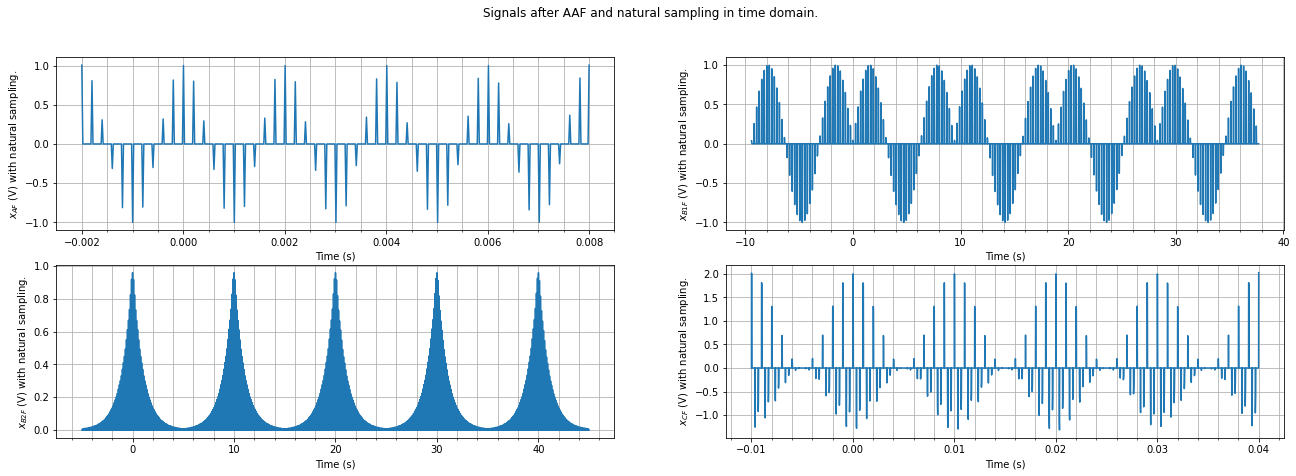

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and natural sampling in time domain.')

ax1.plot(t_A, x_A_filtered_ns)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V) with natural sampling.')

ax2.plot(t_B1, x_B1_filtered_ns)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V) with natural sampling.')

ax3.plot(t_B2, x_B2_filtered_ns)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V) with natural sampling.')

ax4.plot(t_C, x_C_filtered_ns)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V) with natural sampling.')

fig.show()

In [ ]:
# f_A_filtered_ns, X_A_filtered_ns, N_A_filtered_ns = compute_fft(t_A, x_A_filtered_ns, period_A, 5, window='boxcar')
# f_B1_filtered_ns, X_B1_filtered_ns, N_B1_filtered_ns = compute_fft(t_B1, x_B1_filtered_ns, period_B1, 5, window='boxcar')
# f_B2_filtered_ns, X_B2_filtered_ns, N_B2_filtered_ns = compute_fft(t_B2, x_B2_filtered_ns, 10, window='boxcar')
# f_C_filtered_ns, X_C_filtered_ns, N_C_filtered_ns = compute_fft(t_C, x_C_filtered_ns, 0.01, window='boxcar')

f_A_filtered_ns, X_A_filtered_ns, N_A_filtered_ns, window_used_A = fft(t_A, x_A_filtered_ns, period_A, 'best')
f_B1_filtered_ns, X_B1_filtered_ns, N_B1_filtered_ns, window_used_B1 = fft(t_B1, x_B1_filtered_ns, period_B1, 'best')
f_B2_filtered_ns, X_B2_filtered_ns, N_B2_filtered_ns, window_used_B2 = fft(t_B2, x_B2_filtered_ns, 10, 'best')
f_C_filtered_ns, X_C_filtered_ns, N_C_filtered_ns, window_used_C = fft(t_C, x_C_filtered_ns, 0.01, 'best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!


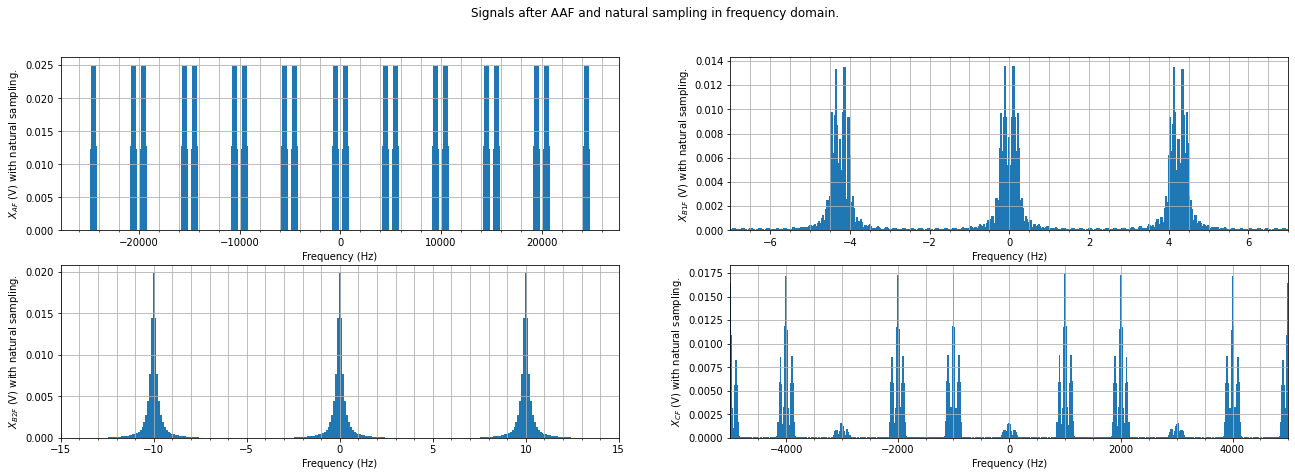

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and natural sampling in frequency domain.')

ax1.bar(f_A_filtered_ns, np.abs(X_A_filtered_ns) * 1/N_A_filtered_ns, width=500)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V) with natural sampling.')

ax2.bar(f_B1_filtered_ns, np.abs(X_B1_filtered_ns) * 1/N_B1_filtered_ns, width=0.06)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V) with natural sampling.')
ax2.set_xlim(left=-7, right=7)

ax3.bar(f_B2_filtered_ns, np.abs(X_B2_filtered_ns) * 1/N_B2_filtered_ns, width=0.1)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V) with natural sampling.')
ax3.set_xlim(left=-15, right=15)

ax4.bar(f_C_filtered_ns, np.abs(X_C_filtered_ns) * 1/N_C_filtered_ns, width=30)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V) with natural sampling.')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

# SAMPLE & HOLD

## Ideal sampling

In [ ]:
def delta_train(f, time_array):
  res = np.zeros(int(np.rint(len(time_array))))

  t_step = np.abs(time_array[0] - time_array[1])
  period = 1/f
  points_per_period = np.rint(period / t_step)
  res = [1 if (i%points_per_period == 0) else 0 for i in range(len(res))]

  return res

In [ ]:
ideal_sampling_signal_A = delta_train(f_s_high, t_A)
ideal_sampling_signal_B1 = delta_train(f_s_low, t_B1)
ideal_sampling_signal_B2 = delta_train(f_s_low, t_B2)
ideal_sampling_signal_C = delta_train(f_s_high, t_C)

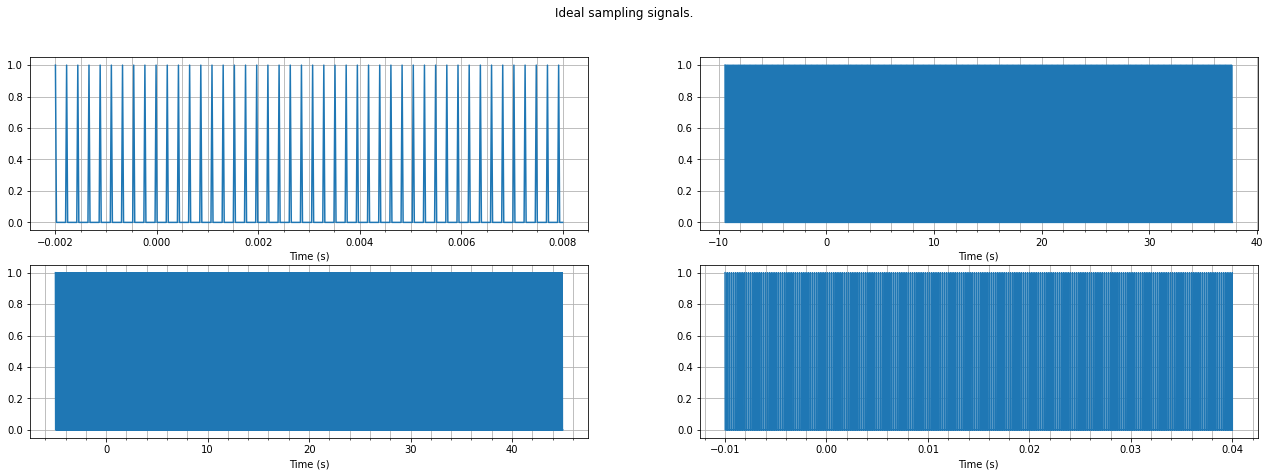

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Ideal sampling signals.')

ax1.plot(t_A, ideal_sampling_signal_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')

ax2.plot(t_B1, ideal_sampling_signal_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')

ax3.plot(t_B2, ideal_sampling_signal_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')

ax4.plot(t_C, ideal_sampling_signal_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')

fig.show()

In [ ]:
x_A_filtered_sample = np.multiply(x_A_filtered, ideal_sampling_signal_A)
x_B1_filtered_sample = np.multiply(x_B1_filtered, ideal_sampling_signal_B1)
x_B2_filtered_sample = np.multiply(x_B2_filtered, ideal_sampling_signal_B2)
x_C_filtered_sample = np.multiply(x_C_filtered, ideal_sampling_signal_C)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


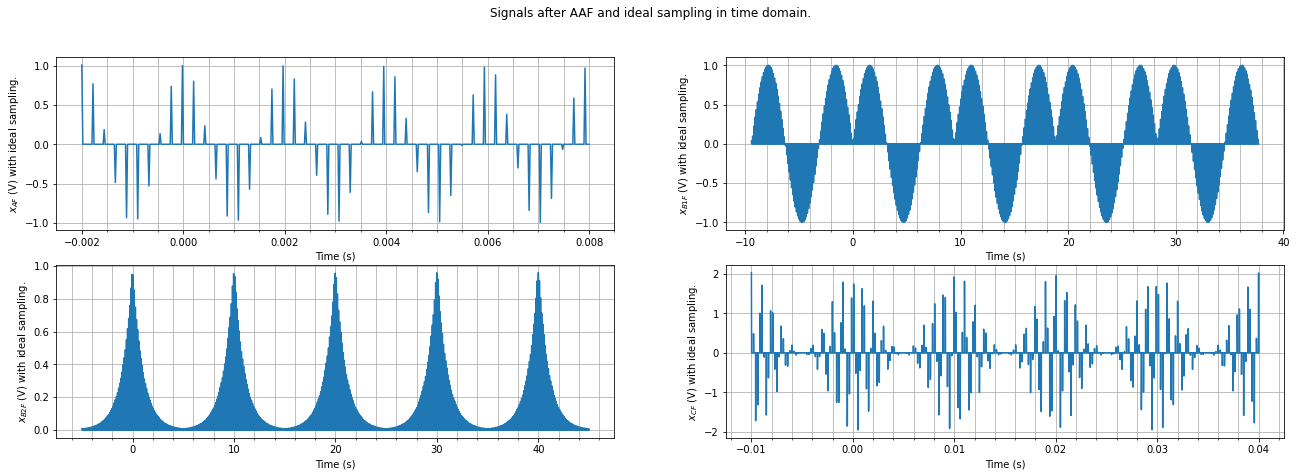

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and ideal sampling in time domain.')

ax1.plot(t_A, x_A_filtered_sample)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V) with ideal sampling.')

ax2.plot(t_B1, x_B1_filtered_sample)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V) with ideal sampling.')

ax3.plot(t_B2, x_B2_filtered_sample)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V) with ideal sampling.')

ax4.plot(t_C, x_C_filtered_sample)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V) with ideal sampling.')

fig.show()

## Hold

In [ ]:
tau_high = 0.3 * 1/f_s_high
tau_low = 0.3 * 1/f_s_low

In [ ]:
def apply_hold(time_array, signal, signal_period, tau,):
  t_step = (max(time_array) - min(time_array)) / len(time_array)
  points_in_tau = int(np.rint(tau / t_step))

  signal_hold = np.array(signal)
  last_non_zero_value = 0
  last_non_zero_index = 0

  for i in range(len(signal)):
    if signal[i] != 0:
      last_non_zero_value = signal[i]
      last_non_zero_index = i
      signal_hold[i] = last_non_zero_value
    else:
      if (i - last_non_zero_index) < points_in_tau:
        signal_hold[i] = last_non_zero_value

  f_filtered_hold, X_filtered_hold, N_filtered_hold, window_used_signal = fft(time_array, signal_hold, signal_period, 'best')

  return (f_filtered_hold, X_filtered_hold, N_filtered_hold, window_used_signal, signal_hold)

In [ ]:
f_A_filtered_hold, X_A_filtered_hold, N_A_filtered_hold, window_used_A, x_A_filtered_hold = apply_hold(t_A, x_A_filtered_sample, period_A, tau_high)
f_B1_filtered_hold, X_B1_filtered_hold, N_B1_filtered_hold, window_used_B1, x_B1_filtered_hold = apply_hold(t_B1, x_B1_filtered_sample, 3*np.pi, tau_low)
f_B2_filtered_hold, X_B2_filtered_hold, N_B2_filtered_hold, window_used_B2, x_B2_filtered_hold = apply_hold(t_B2, x_B2_filtered_sample, 10, tau_low)
f_C_filtered_hold, X_C_filtered_hold, N_C_filtered_hold, window_used_C, x_C_filtered_hold = apply_hold(t_C, x_C_filtered_sample, 0.01, tau_high)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!


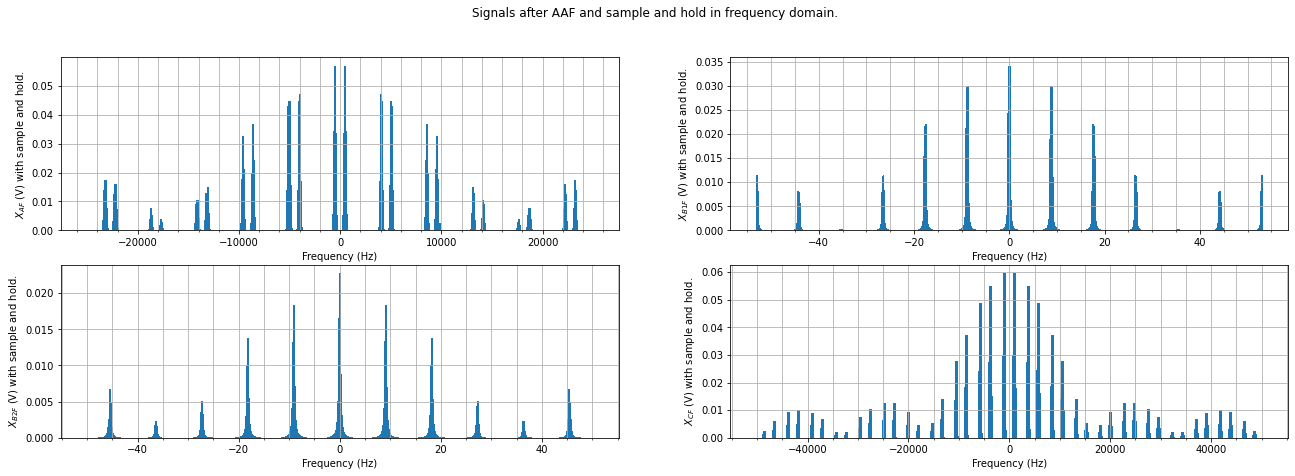

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and sample and hold in frequency domain.')

ax1.bar(f_A_filtered_hold, np.abs(X_A_filtered_hold) * 1/N_A_filtered_hold, width=220)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V) with sample and hold.')

ax2.bar(f_B1_filtered_hold, np.abs(X_B1_filtered_hold) * 1/N_B1_filtered_hold, width=0.4)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V) with sample and hold.')

ax3.bar(f_B2_filtered_hold, np.abs(X_B2_filtered_hold) * 1/N_B2_filtered_hold, width=0.4)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V) with sample and hold.')

ax4.bar(f_C_filtered_hold, np.abs(X_C_filtered_hold) * 1/N_C_filtered_hold, width=600)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V) with sample and hold.')

fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


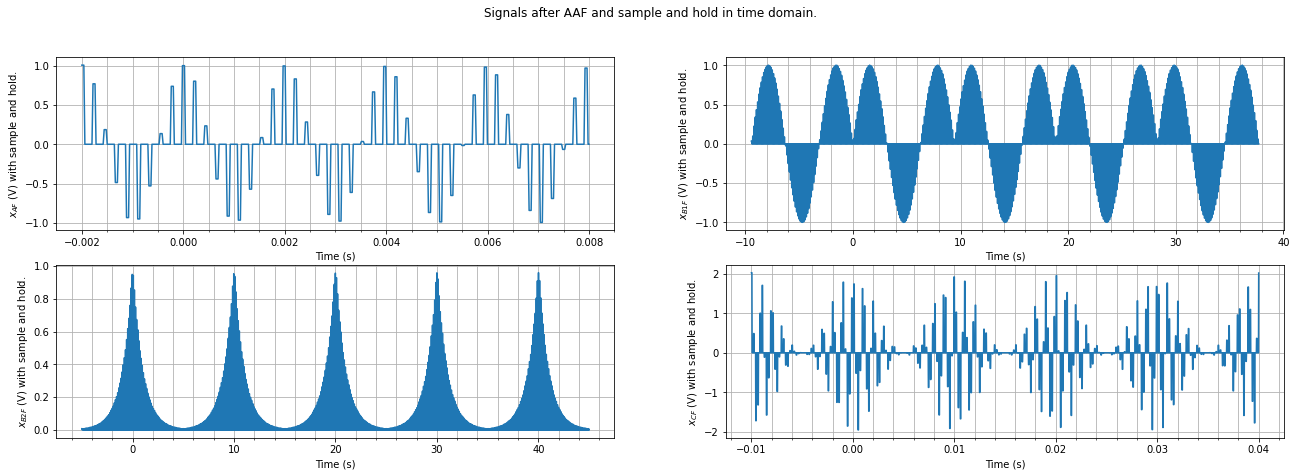

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and sample and hold in time domain.')

ax1.plot(t_A, x_A_filtered_hold)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V) with sample and hold.')

ax2.plot(t_B1, x_B1_filtered_hold)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V) with sample and hold.')

ax3.plot(t_B2, x_B2_filtered_hold)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V) with sample and hold.')

ax4.plot(t_C, x_C_filtered_hold)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V) with sample and hold.')

fig.show()

# SUBNYQUIST SAMPLING
Both types of sampling will be performed but now using subnyquist frequencies, and this will only be used for the $ x_C $ signal, since it's the only one shaped like band pass.

## Natural sampling

In [ ]:
f_sny = 600e3 / 2**10
duty = 0.1
natural_sampling_sny_signal_C = (ss.square(2 * np.pi * f_sny * t_C, duty=duty) + 1) / 2

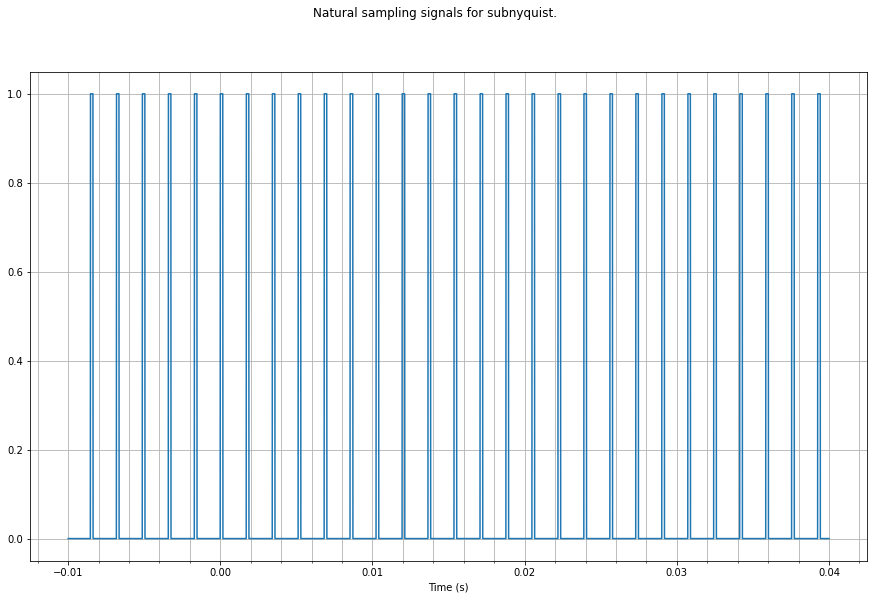

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Natural sampling signals for subnyquist.')

ax.plot(t_C, natural_sampling_sny_signal_C)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')

fig.show()

In [ ]:
x_C_filtered_sny_ns = np.multiply(x_C_filtered, natural_sampling_sny_signal_C)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


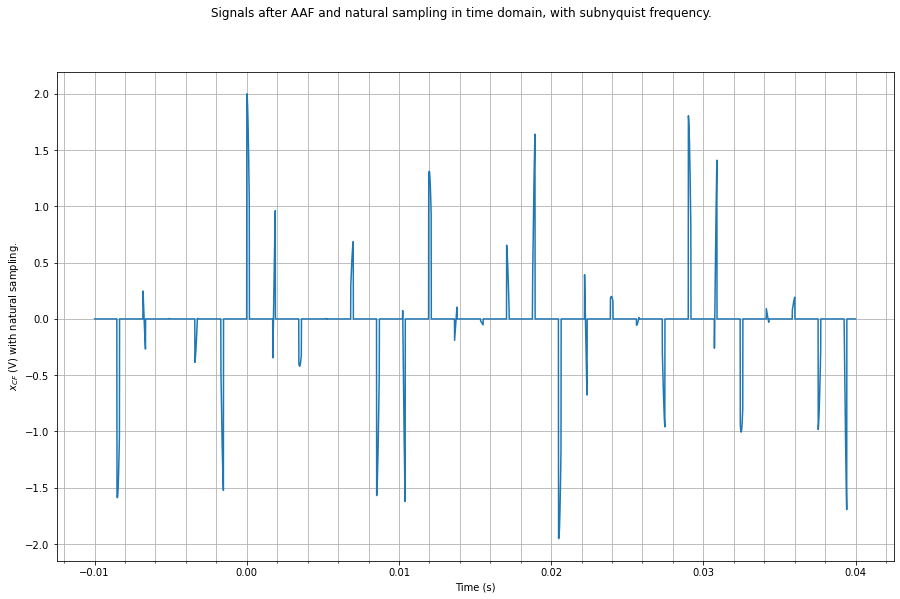

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after AAF and natural sampling in time domain, with subnyquist frequency.')

ax.plot(t_C, x_C_filtered_sny_ns)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')
ax.set_ylabel('$ x_{CF} $ (V) with natural sampling.')

fig.show()

In [ ]:
f_C_filtered_sny_ns, X_C_filtered_sny_ns, N_C_filtered_sny_ns, window_used_C = fft(t_C, x_C_filtered_sny_ns, 0.01, 'best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!


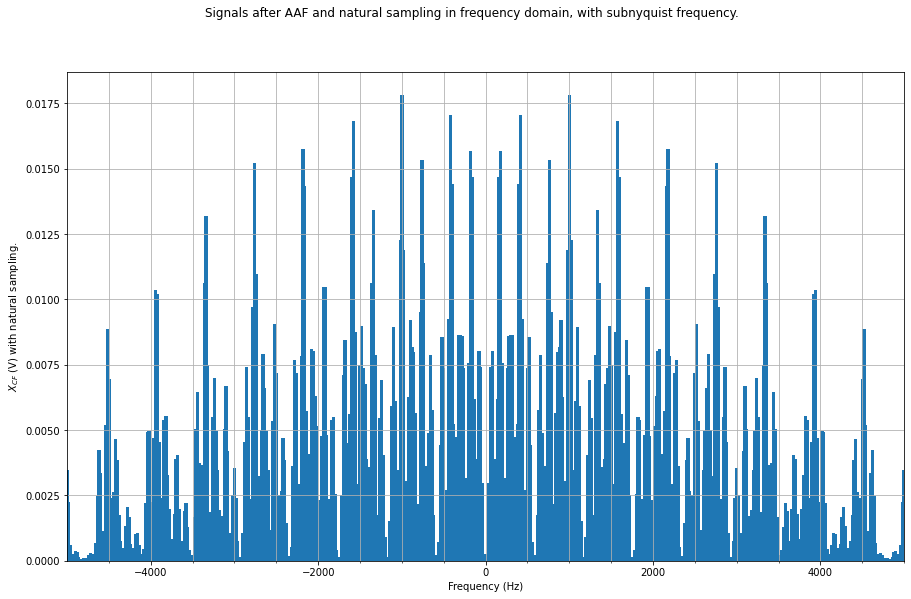

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after AAF and natural sampling in frequency domain, with subnyquist frequency.')

ax.bar(f_C_filtered_sny_ns, np.abs(X_C_filtered_sny_ns) * 1/N_C_filtered_sny_ns, width=40)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$ X_{CF} $ (V) with natural sampling.')
ax.set_xlim(left=-5000, right=5000)

fig.show()

## Sample & Hold

In [ ]:
ideal_sampling_sny_signal_C = delta_train(f_sny, t_C)

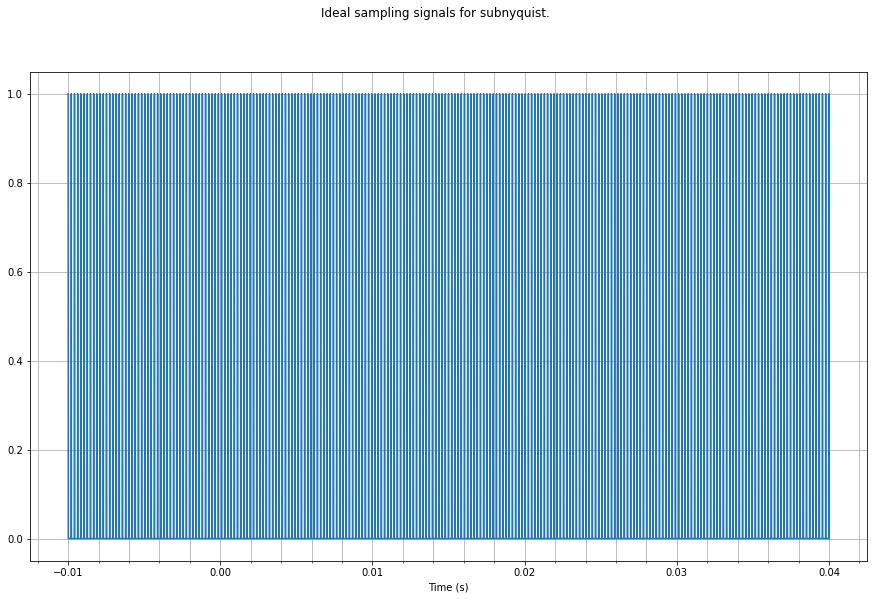

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Ideal sampling signals for subnyquist.')

ax.plot(t_C, ideal_sampling_signal_C)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')

fig.show()

In [ ]:
x_C_filtered_sample_sny = np.multiply(x_C_filtered, ideal_sampling_sny_signal_C)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


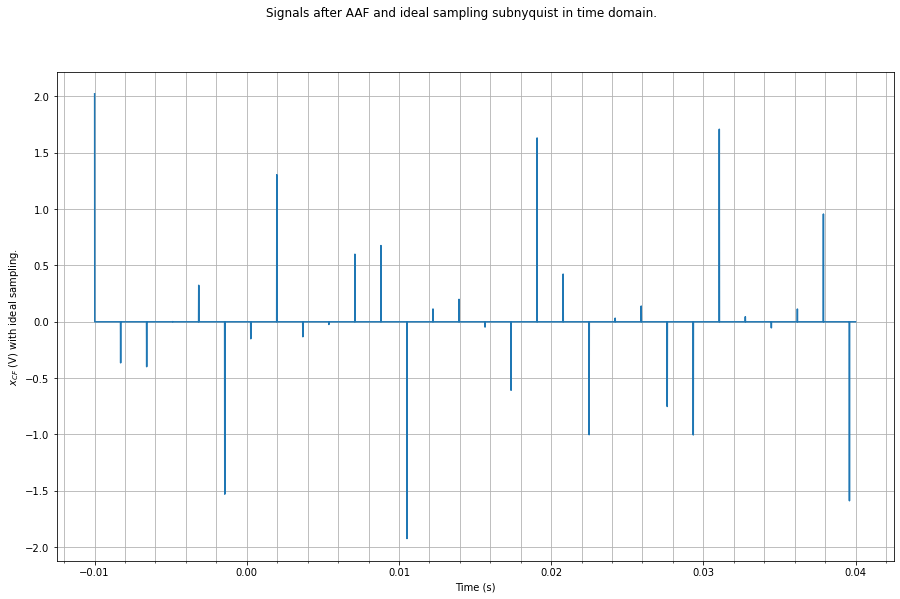

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after AAF and ideal sampling subnyquist in time domain.')

ax.plot(t_C, x_C_filtered_sample_sny)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')
ax.set_ylabel('$ x_{CF} $ (V) with ideal sampling.')

fig.show()

In [ ]:
tau_sny = 0.3 * 1/f_sny

In [ ]:
f_C_filtered_hold_sny, X_C_filtered_hold_sny, N_C_filtered_hold_sny, window_used_C, x_C_filtered_hold_sny = apply_hold(t_C, x_C_filtered_sample_sny, 0.01, tau_sny)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!


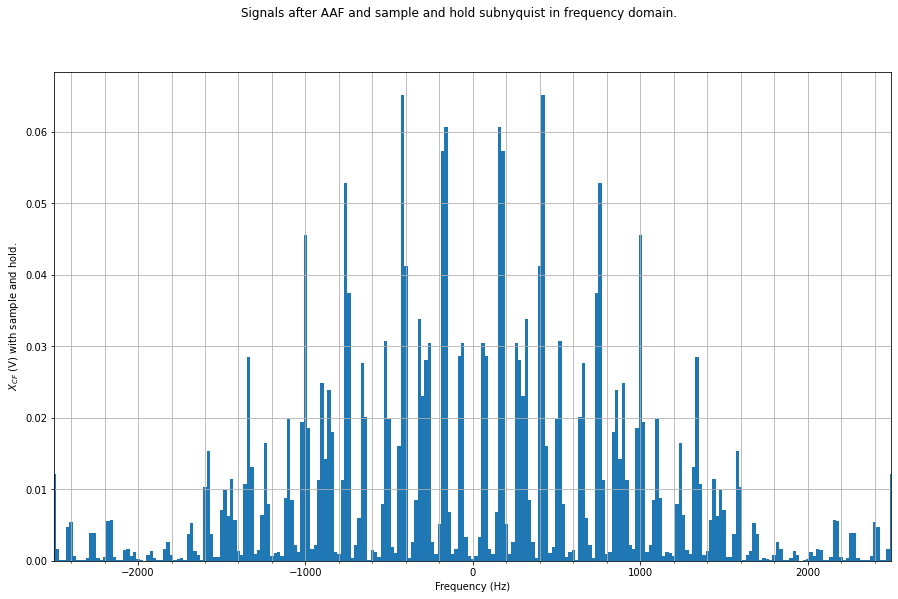

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after AAF and sample and hold subnyquist in frequency domain.')

ax.bar(f_C_filtered_hold_sny, np.abs(X_C_filtered_hold_sny) * 1/N_C_filtered_hold_sny, width=20)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$ X_{CF} $ (V) with sample and hold.')
ax.set_xlim(left=-2500, right=2500)

fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


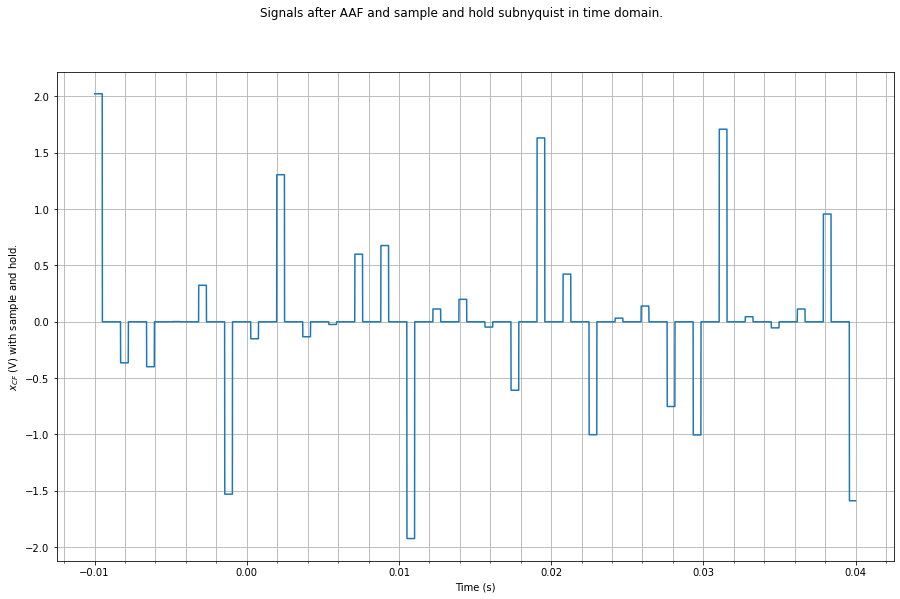

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after AAF and sample and hold subnyquist in time domain.')

ax.plot(t_C, x_C_filtered_hold_sny)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')
ax.set_ylabel('$ x_{CF} $ (V) with sample and hold.')

fig.show()

# RECOVERY FILTER

In [ ]:
f_rec_low = 2.5
f_rec_high = 1.8e3

## Natural sampling

In [ ]:
x_A_recovered_ns, X_A_recovered_ns = apply_aaf(t_A, x_A_filtered_ns, f_A_filtered_ns, X_A_filtered_ns, f_rec_high)
x_B1_recovered_ns, X_B1_recovered_ns = apply_aaf(t_B1, x_B1_filtered_ns, f_B1_filtered_ns, X_B1_filtered_ns, f_rec_low)
x_B2_recovered_ns, X_B2_recovered_ns = apply_aaf(t_B2, x_B2_filtered_ns, f_B2_filtered_ns, X_B2_filtered_ns, f_rec_low)
x_C_recovered_ns, X_C_recovered_ns = apply_aaf(t_C, x_C_filtered_ns, f_C_filtered_ns, X_C_filtered_ns, f_rec_high)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


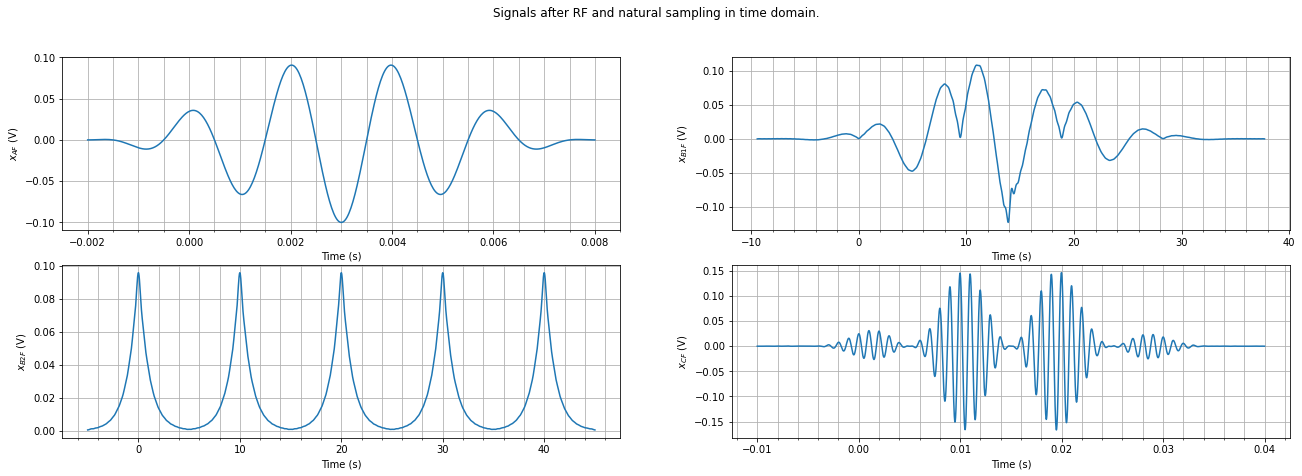

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after RF and natural sampling in time domain.')

ax1.plot(t_A, x_A_recovered_ns)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V)')

ax2.plot(t_B1, x_B1_recovered_ns)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V)')

ax3.plot(t_B2, x_B2_recovered_ns)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V)')

ax4.plot(t_C, x_C_recovered_ns)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V)')

fig.show()

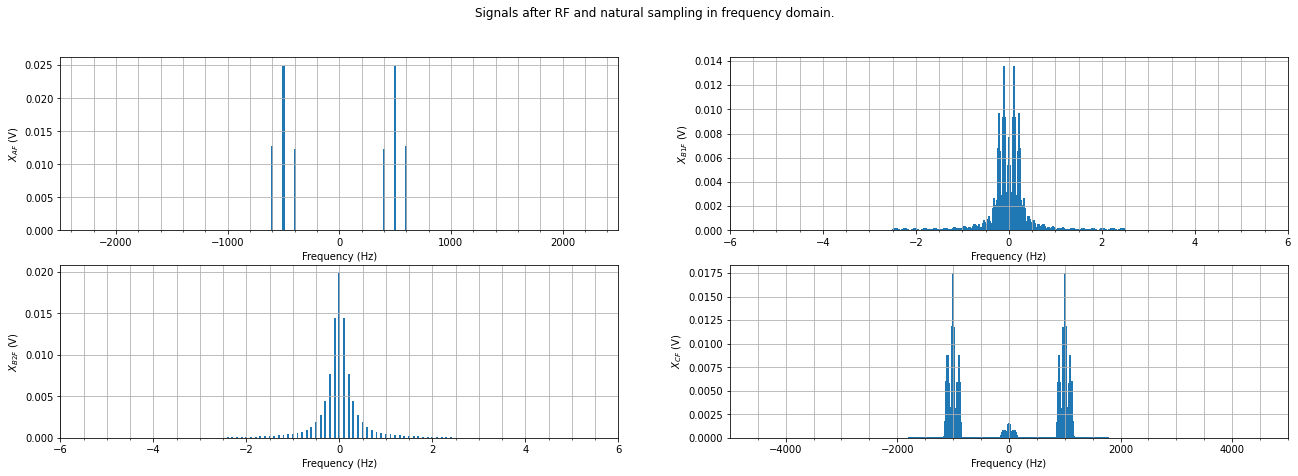

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after RF and natural sampling in frequency domain.')

ax1.bar(f_A, np.abs(X_A_recovered_ns) * 1/N_A, width=20)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V)')
ax1.set_xlim(left=-2500, right=2500)

ax2.bar(f_B1, np.abs(X_B1_recovered_ns) * 1/N_B1, width=0.05)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V)')
ax2.set_xlim(left=-6, right=6)

ax3.bar(f_B2, np.abs(X_B2_recovered_ns) * 1/N_B2, width=0.04)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V)')
ax3.set_xlim(left=-6, right=6)
ax4.bar(f_C, np.abs(X_C_recovered_ns) * 1/N_C, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V)')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

## Sample & Hold

In [ ]:
x_A_recovered_sh, X_A_recovered_sh = apply_aaf(t_A, x_A_filtered_hold, f_A_filtered_hold, X_A_filtered_hold, f_rec_high)
x_B1_recovered_sh, X_B1_recovered_sh = apply_aaf(t_B1, x_B1_filtered_hold, f_B1_filtered_hold, X_B1_filtered_hold, f_rec_low)
x_B2_recovered_sh, X_B2_recovered_sh = apply_aaf(t_B2, x_B2_filtered_hold, f_B2_filtered_hold, X_B2_filtered_hold, f_rec_low)
x_C_recovered_sh, X_C_recovered_sh = apply_aaf(t_C, x_C_filtered_hold, f_C_filtered_hold, X_C_filtered_hold, f_rec_high)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


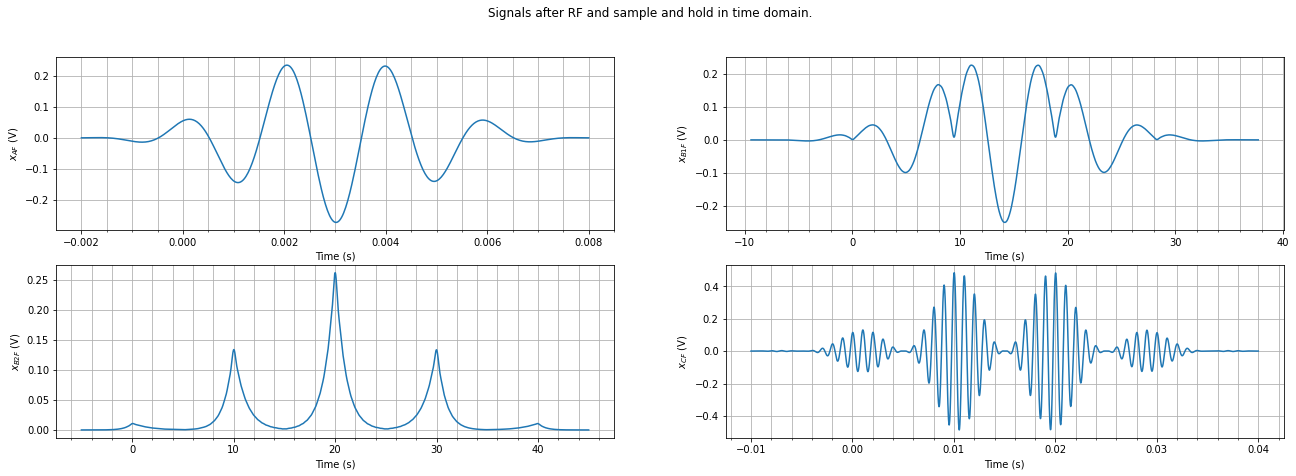

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after RF and sample and hold in time domain.')

ax1.plot(t_A, x_A_recovered_sh)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$ x_{AF} $ (V)')

ax2.plot(t_B1, x_B1_recovered_sh)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$ x_{B1F} $ (V)')

ax3.plot(t_B2, x_B2_recovered_sh)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$ x_{B2F} $ (V)')

ax4.plot(t_C, x_C_recovered_sh)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$ x_{CF} $ (V)')

fig.show()

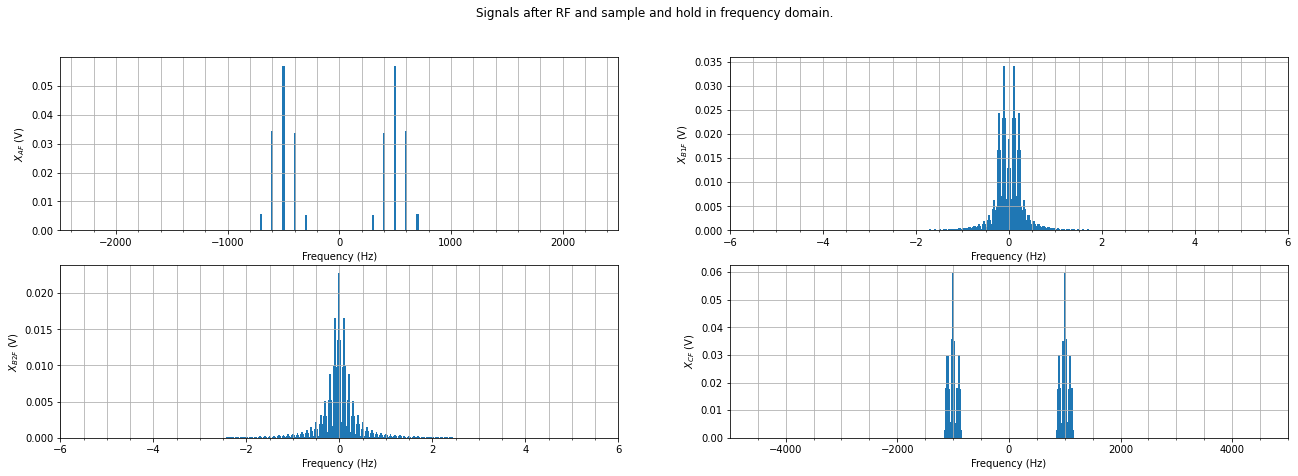

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after RF and sample and hold in frequency domain.')

ax1.bar(f_A, np.abs(X_A_recovered_sh) * 1/N_A, width=20)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V)')
ax1.set_xlim(left=-2500, right=2500)

ax2.bar(f_B1, np.abs(X_B1_recovered_sh) * 1/N_B1, width=0.05)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V)')
ax2.set_xlim(left=-6, right=6)

ax3.bar(f_B2, np.abs(X_B2_recovered_sh) * 1/N_B2, width=0.04)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V)')
ax3.set_xlim(left=-6, right=6)

ax4.bar(f_C, np.abs(X_C_recovered_sh) * 1/N_C, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V)')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

## Subnyquist

### Natural sampling

In [ ]:
x_C_recovered_sny_ns, X_C_recovered_sny_ns = apply_aaf(t_C, x_C_filtered_sny_ns, f_C_filtered_sny_ns, X_C_filtered_sny_ns, f_rec_high)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


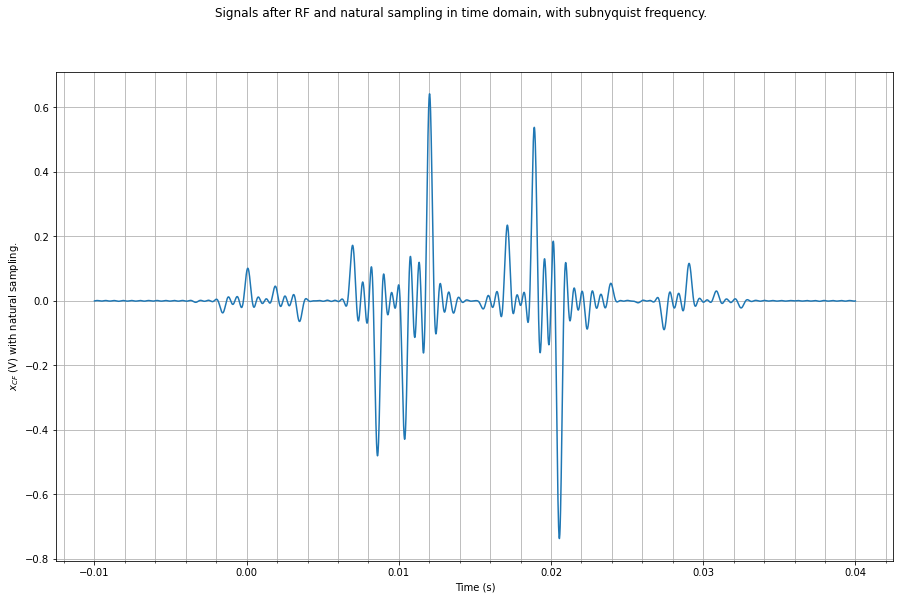

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after RF and natural sampling in time domain, with subnyquist frequency.')

ax.plot(t_C, x_C_recovered_sny_ns)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')
ax.set_ylabel('$ x_{CF} $ (V) with natural sampling.')

fig.show()

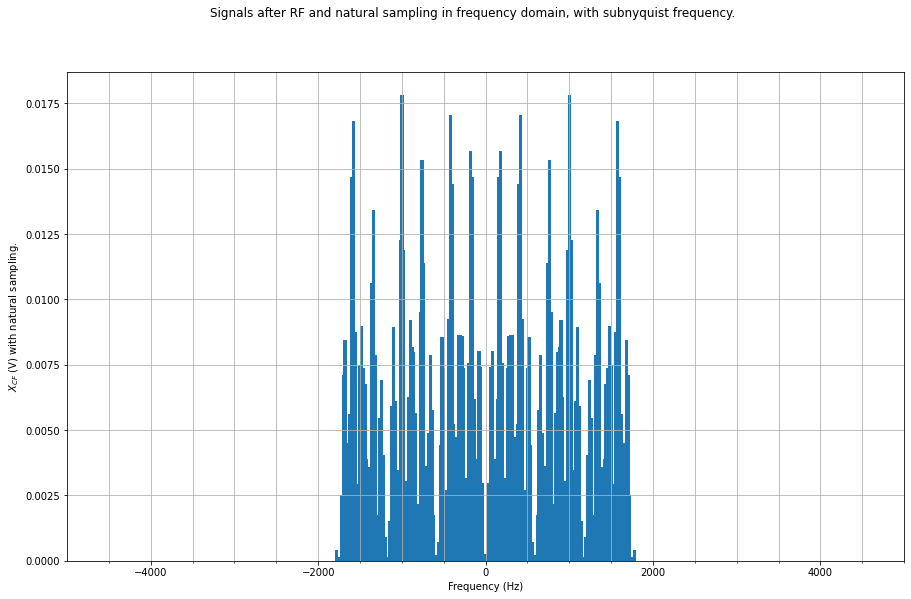

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after RF and natural sampling in frequency domain, with subnyquist frequency.')

ax.bar(f_C_filtered_sny_ns, np.abs(X_C_recovered_sny_ns) * 1/N_C_filtered_sny_ns, width=40)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$ X_{CF} $ (V) with natural sampling.')
ax.set_xlim(left=-5000, right=5000)

fig.show()

### Sample & Hold

In [ ]:
x_C_recovered_hold_sny, X_C_recovered_hold_sny = apply_aaf(t_C, x_C_filtered_hold_sny, f_C_filtered_hold_sny, X_C_filtered_hold_sny, f_rec_high)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


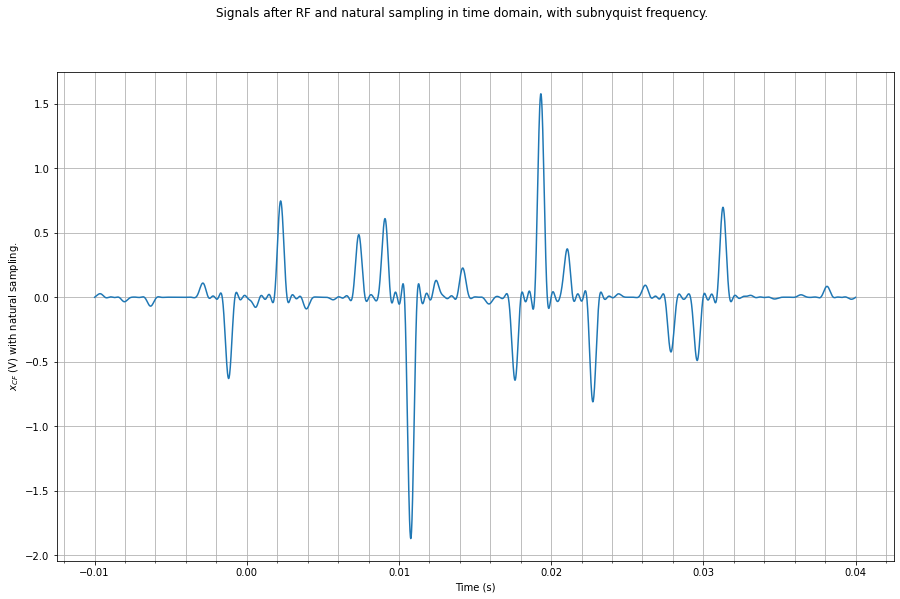

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after RF and natural sampling in time domain, with subnyquist frequency.')

ax.plot(t_C, x_C_recovered_hold_sny)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Time (s)')
ax.set_ylabel('$ x_{CF} $ (V) with natural sampling.')

fig.show()

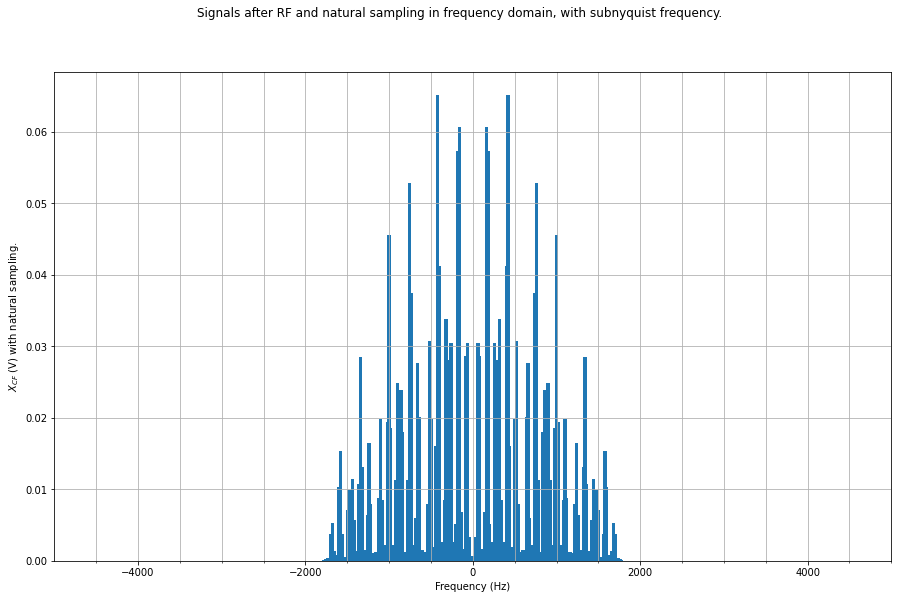

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Signals after RF and natural sampling in frequency domain, with subnyquist frequency.')

ax.bar(f_C_filtered_hold_sny, np.abs(X_C_recovered_hold_sny) * 1/N_C_filtered_hold_sny, width=40)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$ X_{CF} $ (V) with natural sampling.')
ax.set_xlim(left=-5000, right=5000)

fig.show()